Start by importing the necessary libraries.

In [23]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

Question 1.

Consider a proton moving in x-direction in a homogeneous magnetic field with a field axis in z-
direction. The proton has an energy of 1 MeV and the field strength is 3 T. Using an ordinary
differential equation solver, follow the motion of this particle for 1 microsecond. Plot and describe
the result.

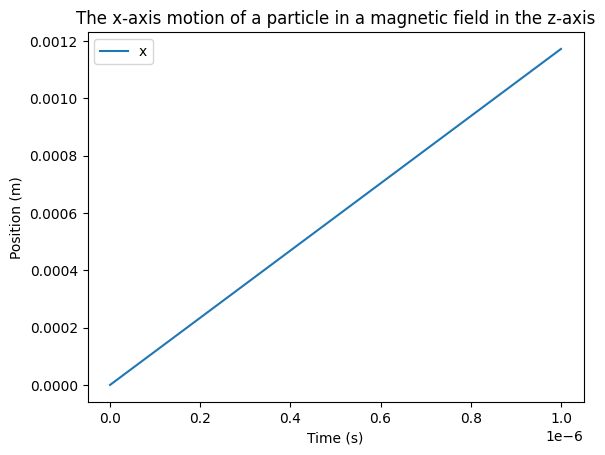

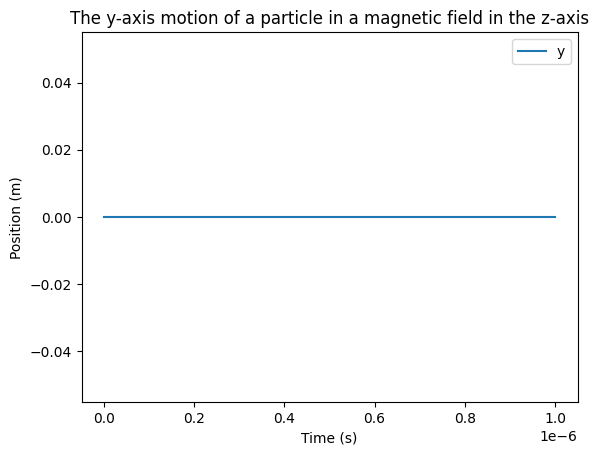

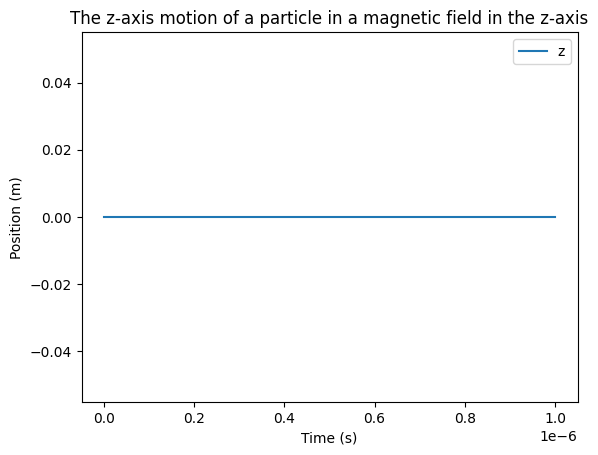

In [24]:
# Define some constants
q = 1.60217-19          # charge of proton
m = 1.67262-27          # mass of proton
p_energy = 1*10**6      # energy of the proton
B = np.array([0, 0, 3]) # the magnetic field

# Define the intial conditions
v0_1 = np.sqrt(2 * p_energy * q / m)  # velocity
y0_1 = np.array([0, v0_1, 0, 0, 0, 0])  # the initial state (x, vx, y, vy, z, vz)

def ODE_1(t, y):
    """ Function for the differential equation of the motion of the proton. """

    # Extract the state
    x, vx, y, vy, z, vz = y

    # Get the forces. Since the field is only in the z-direction there will only be a force in the x direction
    ax = q * (vx * B[2])
    ay = 0  
    az = 0 
    return [vx, ax, vy, ay, vz, az]

# Now we solve the ODE and extract the solution
sol = solve_ivp(ODE_1, [0, 1e-6], y0_1, method='RK45')

t = sol.t
x = sol.y[0]
y = sol.y[2]
z = sol.y[4]

# Visualize the results
plt.plot(t, x, label='x')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('The x-axis motion of a particle in a magnetic field in the z-axis')
plt.legend()
plt.show()

plt.plot(t, y, label='y')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('The y-axis motion of a particle in a magnetic field in the z-axis')
plt.legend()
plt.show()

plt.plot(t, z, label='z')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('The z-axis motion of a particle in a magnetic field in the z-axis')
plt.legend()
plt.show()

Question 2.

Launch the same proton (energy 1 MeV) in the same magnetic field (3 T, parallel to the z-axis), but
this time the initial proton velocity has both and x- and a z-component. Follow the motion of this
particle for 1 microsecond. Plot and describe the result.

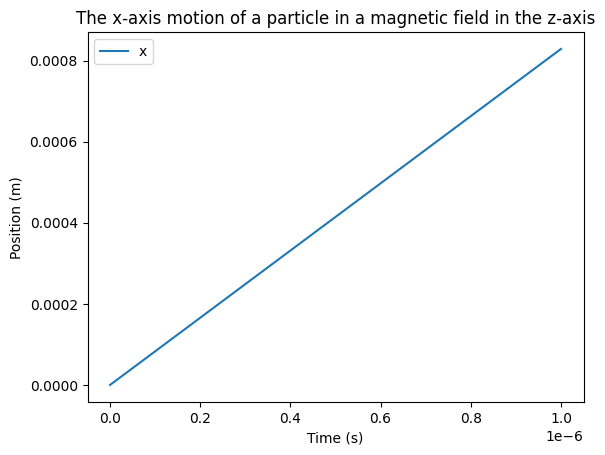

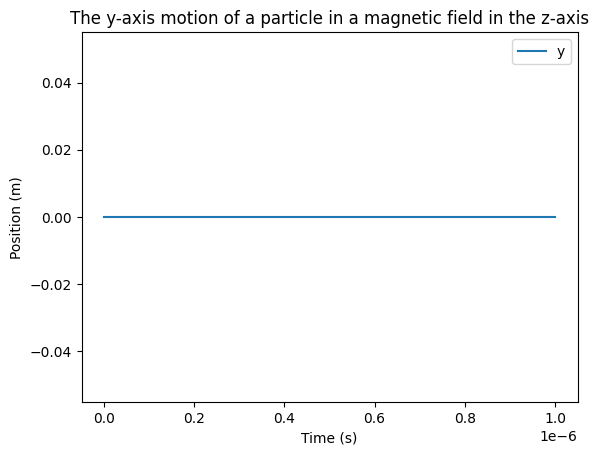

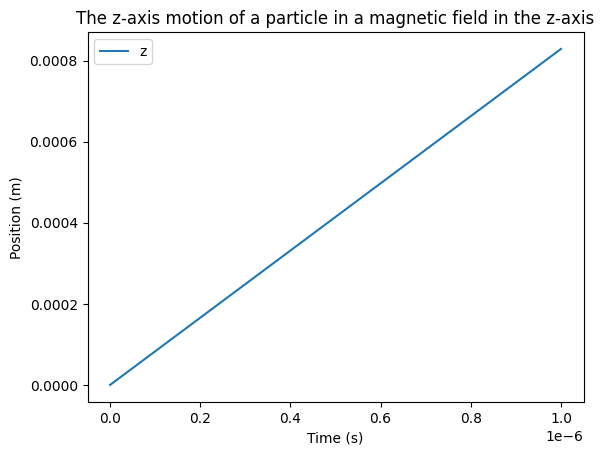

In [25]:
# Define the intial conditions
v0x_2 = np.sqrt(p_energy * q / m)                   # Velocity in x-direction 
v0z_2 = np.sqrt(p_energy * q / m)                   # Velocity in z-direction
y0_2 = np.array([0, v0x_2, 0, 0, 0, v0z_2])         # the initial state (x, vx, y, vy, z, vz)

def ODE_2(t, y):
    """ Function for the differential equation of the motion of the proton. """

    # Extract the state
    x, vx, y, vy, z, vz = y

    # Get the forces. In this case there will be a force in the x direction aswell as the z direction.
    ax = q * (vx * B[2])
    ay = 0  # No force in the y-direction
    az = q * (vz * B[2])
    return [vx, ax, vy, ay, vz, az]

# Now we solve the ODE and extract the solution
sol = solve_ivp(ODE_2, [0, 1e-6], y0_2, method='RK45')

t = sol.t
x = sol.y[0]
y = sol.y[2]
z = sol.y[4]

# Visualize the results
plt.plot(t, x, label='x')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('The x-axis motion of a particle in a magnetic field in the z-axis')
plt.legend()
plt.show()

plt.plot(t, y, label='y')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('The y-axis motion of a particle in a magnetic field in the z-axis')
plt.legend()
plt.show()

plt.plot(t, z, label='z')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('The z-axis motion of a particle in a magnetic field in the z-axis')
plt.legend()
plt.show()

Question 3.

Repeat question 2, but make a 3D plot of your results.

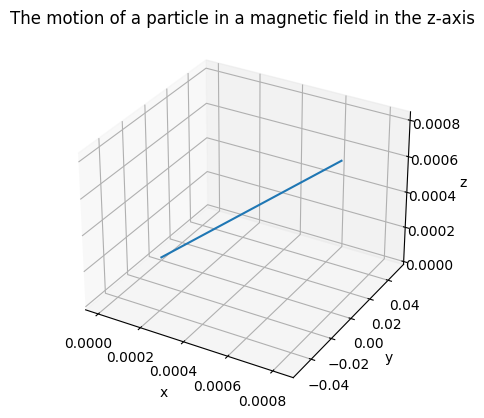

In [26]:
# Simply use the results from question 2 but use a 3D plot.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('The motion of a particle in a magnetic field in the z-axis')
plt.show()


Question 4.

Change the magnetic field so that it is cylindrically symmetric around the z-axis. If R is the distance
from the z-axis, in m, the magnitude of the magnetic field is 9T/R. The direction of the B-field at any
point should be along a ring around z in the clockwise direction.
Launch a 1 MeV proton at R = 3 meters straight up (in the z-direction) and plot the first microsecond.
Describe the result. It can be noted that the field at R = 3m is very similar to the case in question 1
with a gentle gradient added. The solution should be very similar to that of question 1.
Note: Cartesian is not the only possible coordinate system. The cross product works in cylindrical
coordinates, too. This might simplify things a bit. However, the acceleration and velocity terms are
more complicated.

Question 5.

Repeat question 4, but make a 3D plot of your results.

Question 6.

Evaluate the drift velocity in question 4.